In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression
import seaborn as sns;
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.externals import six
from sklearn.cluster import KMeans


C:\Users\Sandipan\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

# IMPORTING DATASET

In [5]:
%matplotlib inline

weather_dataframe=pd.read_csv("project.csv")
display('weather_dataframe')

,Day,Temperature,Precipitation(%),Wind Speed(kmph),humidity(%),Rainfall,Thunderstorm
0,1,35,68,12,78,no,no
1,2,31,72,18,83,no,no
2,3,29,54,17,87,no,no
3,4,36,50,17,71,no,no
4,5,37,59,20,61,no,no
5,6,33,64,24,79,no,no
6,7,30,59,22,92,no,no
7,8,36,71,24,67,no,no
8,9,36,66,24,58,no,no
9,10,33,68,25,79,no,no


# BAR GRAPH

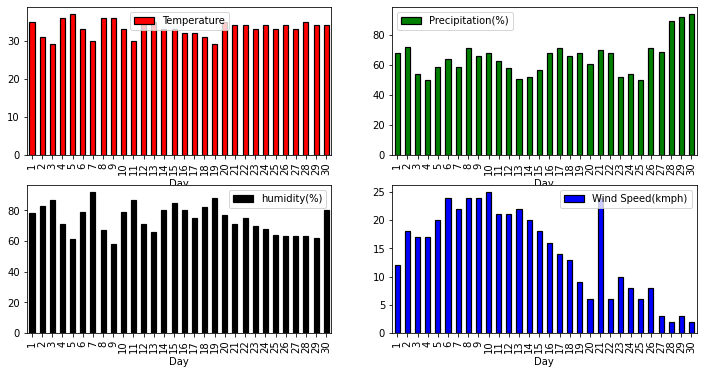

In [6]:
#PLOTTING BAR GRAPH FOR DIFFERENT ATTRIBUTES
fig, axes = plt.subplots(nrows=2, ncols=2)
weather_dataframe.plot(x='Day',y='Temperature',edgecolor='black', linewidth=1.2,kind='bar',color='red',ax=axes[0,0])
weather_dataframe.plot(x='Day',y='Precipitation(%)',edgecolor='black', linewidth=1.2,kind='bar',color='green',ax=axes[0,1])
weather_dataframe.plot(x='Day',y='humidity(%)',edgecolor='black', linewidth=1.2,kind='bar',color='black',ax=axes[1,0])
weather_dataframe.plot(x='Day',y='Wind Speed(kmph)',edgecolor='black', linewidth=1.2,kind='bar',color='blue',ax=axes[1,1])
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


In [7]:
# CALCULATING MEAN OF ATTRIBUTES
print(weather_dataframe.mean())

Day                 15.500000
Temperature         33.300000
Precipitation(%)    65.166667
Wind Speed(kmph)    14.500000
humidity(%)         74.166667
dtype: float64


# POLYNOMIAL REGRESSION

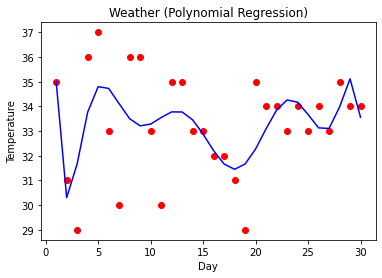

In [8]:
X= weather_dataframe[['Day']]
Y= weather_dataframe['Temperature']

#Splitting the target into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2)


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

# Visualising the Polynomial Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Weather (Polynomial Regression)')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()


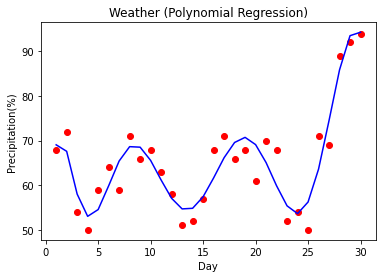

In [9]:
Y1= weather_dataframe['Precipitation(%)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y1,test_size=0.2)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y1)
# Visualising the Polynomial Regression results
plt.scatter(X, Y1, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Weather (Polynomial Regression)')
plt.xlabel('Day')
plt.ylabel('Precipitation(%)')
plt.show()


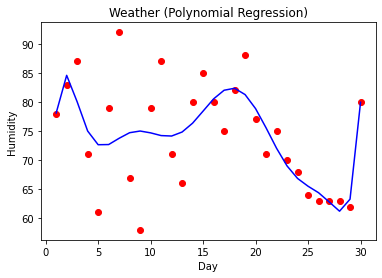

In [10]:
#humidity
Y2= weather_dataframe['humidity(%)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y2,test_size=0.2)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y2)
# Visualising the Polynomial Regression results
plt.scatter(X, Y2, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Weather (Polynomial Regression)')
plt.xlabel('Day')
plt.ylabel('Humidity')
plt.show()

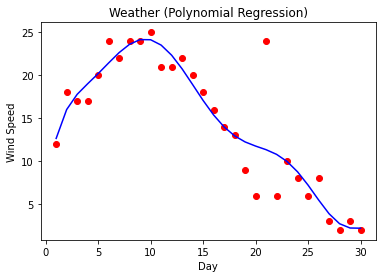

In [11]:
#wind speed

Y4= weather_dataframe['Wind Speed(kmph)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y4,test_size=0.2)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y4)

# Visualising the Polynomial Regression results
plt.scatter(X, Y4, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Weather (Polynomial Regression)')
plt.xlabel('Day')
plt.ylabel('Wind Speed')
plt.show()



# HEAT MAP

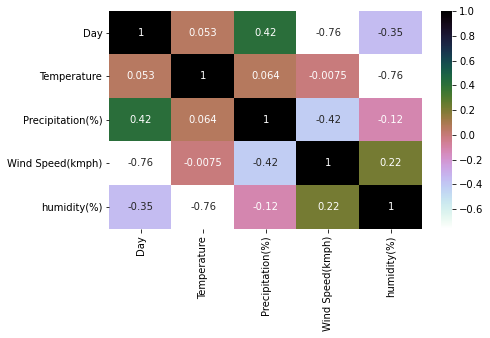

In [12]:

plt.figure(figsize=(7,4)) 
sns.heatmap(weather_dataframe.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# LOGISTIC REGRESSION

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


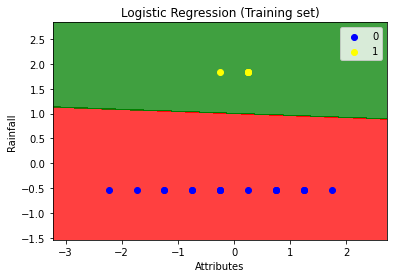

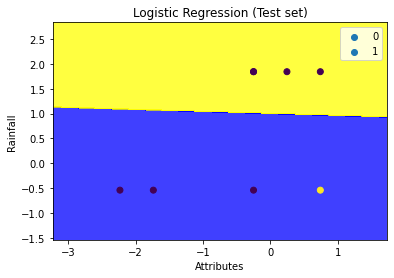

The accuracy of the Logistic Regression is: 1.0


In [13]:
# Logistic Regression
rainfall_map={'yes':1 ,'no':0}
weather_dataframe['Rainfall']=weather_dataframe['Rainfall'].map(rainfall_map)
X = weather_dataframe.iloc[:, [1, 5]].values
y = weather_dataframe.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Attributes')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Attributes')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

model = LogisticRegression()
model.fit(X_train,y_train) 
prediction=model.predict(X_test) 
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(prediction,y_test))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


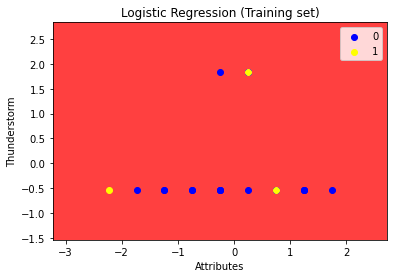

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


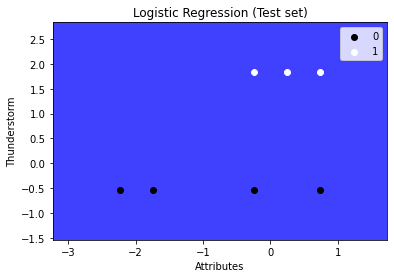

0.625

In [14]:

t_map={'yes':1 ,'no':0}
weather_dataframe['Thunderstorm']=weather_dataframe['Thunderstorm'].map(t_map)
X = weather_dataframe.iloc[:, [1, 5]].values
y = weather_dataframe.iloc[:, 6].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Attributes')
plt.ylabel('Thunderstorm')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Attributes')
plt.ylabel('Thunderstorm')
plt.legend()
plt.show()

# Predicting a new result with Logistic Regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# KMEANS CLUSTERING

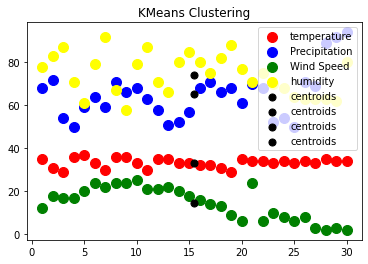

In [15]:
kmeans=KMeans(n_clusters=1,init='k-means++',max_iter= 30,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(weather_dataframe)
plt.scatter(weather_dataframe.values[y_kmeans==0,0],weather_dataframe.values[y_kmeans==0,1],s=100,c='red',label='temperature')
plt.scatter(weather_dataframe.values[y_kmeans==0,0],weather_dataframe.values[y_kmeans==0,2],s=100,c='blue',label='Precipitation')
plt.scatter(weather_dataframe.values[y_kmeans==0,0],weather_dataframe.values[y_kmeans==0,3],s=100,c='green',label='Wind Speed')
plt.scatter(weather_dataframe.values[y_kmeans==0,0],weather_dataframe.values[y_kmeans==0,4],s=100,c='yellow',label='humidity')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black',label='centroids')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=50,c='black',label='centroids')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,3],s=50,c='black',label='centroids')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,4],s=50,c='black',label='centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()